# Thompson Sampling template

## ==== import the dateset ========

In [1]:
import pandas as pd
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## ======== How Random Selection performs? ========

### ====== Implement Random Selection =======

In [2]:
import random
num_ads = 10
ads_selected = []
total_reward = 0
for i in range(dataset.shape[0]):
    ad = random.randrange(num_ads)
    ads_selected.append(ad)
    total_reward += dataset.iloc[i, ad]
print ('Random Selection gets reward:', total_reward)

Random Selection gets reward: 1272


### ======= Visualize ========

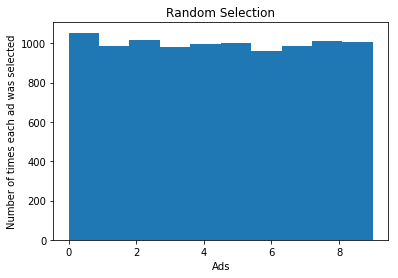

In [3]:
import matplotlib.pyplot as plt
plt.hist(ads_selected)
plt.title('Random Selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## ======= How Thompson Sampling performs? ========

### ===== Implement Thompson Sampling ======

In [4]:
import math
ads_reward_1 = [0]*num_ads
ads_reward_0 = [0]*num_ads
adds_selected = []
beta_ads =[0]*num_ads

### Now UCB algorithm
for each_round in range(dataset.shape[0]):
    for i in range(num_ads):
        beta_ads[i] = random.betavariate(ads_reward_1[i]+1, ads_reward_0[i]+1)
    
    ad = beta_ads.index(max(beta_ads))
    if dataset.iloc[each_round, ad] == 1:
        ads_reward_1[ad] += 1
    else:
        ads_reward_0[ad] += 1
    adds_selected.append(ad) 
print ('UCB gets reward:', sum(ads_reward_1))

UCB gets reward: 2595


### ======= Visualize ========

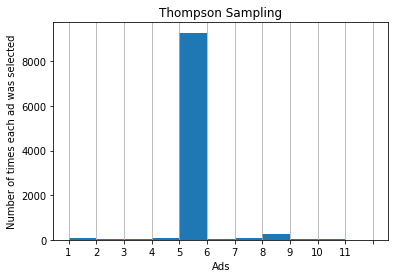

In [5]:
import numpy as np
plt.hist(adds_selected, bins=np.arange(0, 12))
plt.title('Thompson Sampling')
plt.xticks(np.arange(0, 12), [str(i) for i in range(1, 12)])
plt.grid(axis='x')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()